In [1]:
# http://devarea.com/python-machine-learning-example-linear-regression/#.Wv7au1MvzOQ
# https://pandas.pydata.org/pandas-docs/stable/10min.html
# https://www.datacamp.com/community/tutorials/seaborn-python-tutorial

import matplotlib.pyplot as py
import seaborn as sb
import pandas as pd

In [3]:
df=sb.load_dataset('tips')

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [10]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
216,28.15,3.00,Male,Yes,Sat,Dinner,5
176,17.89,2.00,Male,Yes,Sun,Dinner,2
230,24.01,2.00,Male,Yes,Sat,Dinner,4
110,14.00,3.00,Male,No,Sat,Dinner,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2


In [15]:
# What is the hardest day to work?

df.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [16]:
# What is the best day to work?

df2=df.groupby('day').sum() # sum per day
df2.drop('size',inplace=True,axis=1) # sum of size column is not relevant
df2['percent'] = df2['tip']/df2['total_bill']*100 # add percents

In [17]:
df2

,total_bill,tip,percent
day,,,
Thur,1096.33,171.83,15.673201
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791


In [18]:
# Group by day and table size

df4= df.groupby(['day','size']).sum()
df4['percent'] = df4['tip']/df4['total_bill']*100
df4.dropna() # drop null rows

total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
Sun  2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

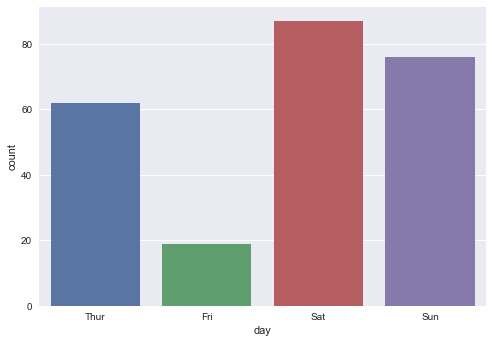

In [19]:
# Visualize using Seaborn
import matplotlib.pyplot as plt
sb.countplot(x='day' ,data=df)
plt.show()

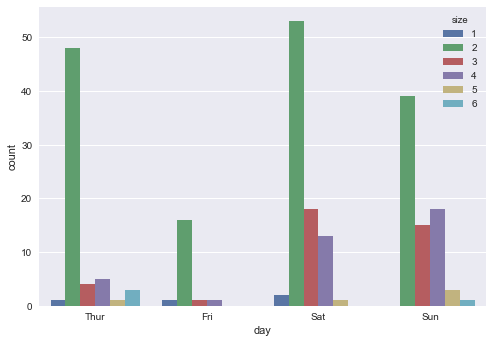

In [20]:
sb.countplot(x='day',hue='size' ,data=df)
plt.show()

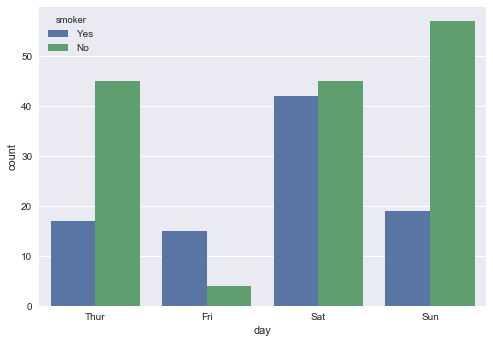

In [21]:
sb.countplot(x='day',hue='smoker' ,data=df)
plt.show()